# goto the following notebook and copy it on your drive and apply neccessary algorithms for given dataset. evaluate the model using one feature and multiple feature selection techniques to select one feature

# data loading

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("ads.csv")

In [4]:
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [5]:
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [6]:
df.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [7]:
df.shape

(200, 5)

In [8]:
df.info() #df.info gives the information about tha data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [11]:
df.isna().sum()#check missing values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<Axes: >

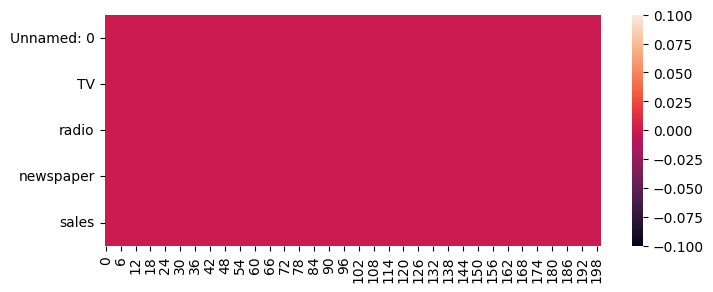

In [12]:
#data visualizatio
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
sns.heatmap(df.isna().transpose())

<Axes: xlabel='TV', ylabel='sales'>

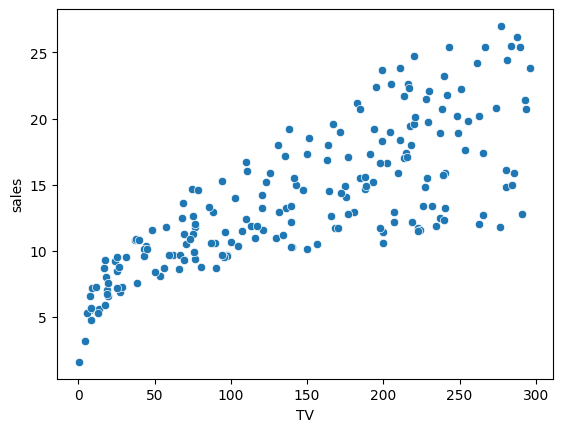

In [13]:
sns.scatterplot(x='TV', y='sales', data=df)

<Axes: xlabel='radio', ylabel='sales'>

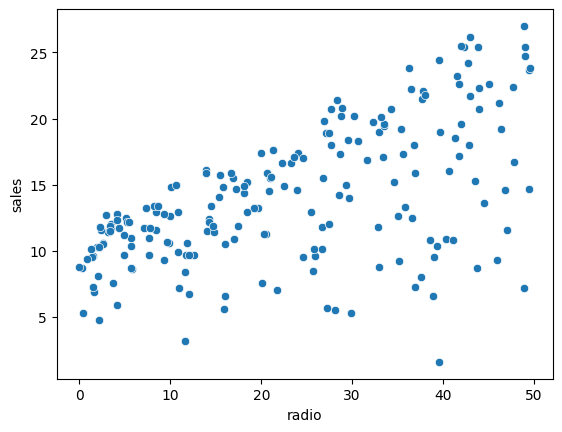

In [14]:
sns.scatterplot(x='radio', y='sales', data=df)

<Axes: xlabel='newspaper', ylabel='sales'>

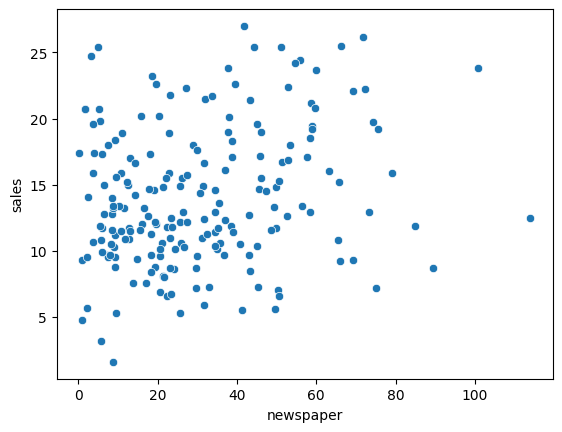

In [15]:
sns.scatterplot(x='newspaper', y='sales', data=df)

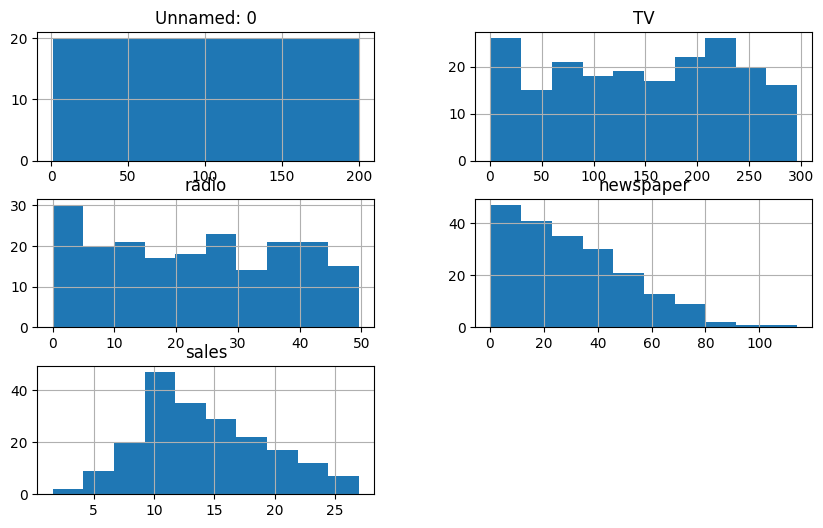

In [16]:
df.hist(bins=10,figsize=(10,6))
plt.show()

In [17]:
df.groupby('sales').mean ()

Unnamed: 0      TV      radio  newspaper
sales                                          
1.6    131.000000    0.70  39.600000        8.7
3.2    156.000000    4.10  11.600000        5.7
4.8      9.000000    8.60   2.100000        1.0
5.3     94.000000    9.25  15.150000       17.5
5.5     57.000000    7.30  28.100000       41.4
...           ...     ...        ...        ...
24.7   129.000000  220.30  49.000000        3.2
25.4    94.666667  266.60  45.033333       33.5
25.5   199.000000  283.60  42.000000       66.2
26.2   184.000000  287.60  43.000000       71.8
27.0   176.000000  276.90  48.900000       41.8

[121 rows x 4 columns]

In [18]:
df['sales'].value_counts()

sales
9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: count, Length: 121, dtype: int64

# observing corelation between features

In [19]:
df.corr()

Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000

<Axes: >

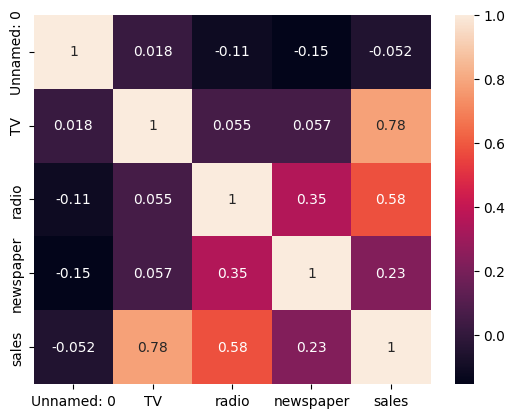

In [20]:
sns.heatmap(df.corr(),annot=True)

# feature selection
Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.



In [21]:
X = df [['TV']]
y=df.sales

In [22]:
X

TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]

In [23]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# train test splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 0.2 means 20% test data


X is the independent variable and y is the target variable (output). In train_test_split, test_size indicates the size of the dataset for testing. The value of 0.2 means that the data is divided into 80% for training and 20% for testing. random_state to randomize the training and test data

In [25]:
X_train.shape,y_train.shape

((160, 1), (160,))

In [26]:
X_test.shape,y_test.shape

((40, 1), (40,))

# training data
model fitting
to ensure that the algorithm is accurate, reliable, and unbiased.



In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.score(X_test,y_test)

0.6766954295627076

#  Prediction
we can get the coefficient and intercept values from the model using attributes like coef_ and intercept_:

In [29]:
m=model.coef_
c=model.intercept_
print(f"m={m}")
print(f"c={c}")

m=[0.04652973]
c=7.119638430592953


# From these two values, we can calculate linear regression . For example, if we want to predict how many sales we will get if we have a budget for television advertising of $50 ?

In [30]:
model.predict([[50]])

C:\Users\Oxford Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.44612512])

# evaluation

In [31]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [32]:
r2

0.6766954295627076

In [33]:
mse

10.204654118800956

In [34]:
mae

2.444420003751042

# multiple linear regression

In [36]:
X=df.drop(columns='sales',axis=1)
# to drop a column axis should be return as 1 , if we have to drop row then axis should be 0
y=df['sales']

In [37]:
X

Unnamed: 0     TV  radio  newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]

In [38]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape,y_train.shape

((160, 4), (160,))

In [42]:
X_test.shape,y_test.shape

((40, 4), (40,))

In [49]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
model.score(X_test,y_test)

0.8986489151417081

In [45]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [46]:
r2

0.8986489151417081

In [47]:
mse

3.1990044685889014

In [48]:
mae

1.4650601050102925